In [18]:
# Regresion logistica
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Importar el dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [20]:
print(dataset.shape)

(400, 3)


In [21]:
# Seleccionar las columnas independientes
x = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values

In [22]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0
)

In [23]:
# Escalado de variables
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [24]:
# Ajustar el modelo de regresion logistica en el conjunto de entrenamiento
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)

classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [26]:
# Prediccion de los resultados con el conjunto de testing
y_pred = classifier.predict(x_test)

print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [27]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[65  3]
 [ 8 24]]


C:\Users\DiazMaximilianoDanie\AppData\Local\Temp\ipykernel_4948\3383818214.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


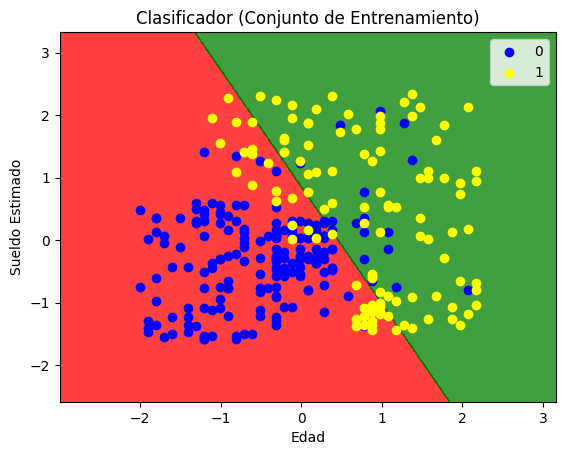

In [32]:
# Representacion grafica de los resultados del algoritmo en el conjunto de entrenamiento
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)

plt.xlim(x1.min(), x1.max())

plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c=ListedColormap(('blue', 'yellow'))(i), label=j
    )
    
plt.title('Clasificador (Conjunto de Entrenamiento)')

plt.xlabel('Edad')

plt.ylabel('Sueldo Estimado')

plt.legend()

plt.show()